In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

CRIM:자치시(town) 별 1인당 범죄율

ZN:25,000 평방피트를 초과하는 거주지역의 비율

INDUS: 비소매상업지역이 점유하고 있는 토지의 비율

CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)

NOX: 10ppm 당 농축 일산화질소

RM: 주택 1가구당 평균 방의 개수

AGE:1940년 이전에 건축된 소유주택의 비율

DIS: 5개의 보스턴 직업센터까지의 접근성 지수

RAD: 방사형 도로까지의 접근성 지수

TAX: 10,000 달러 당 재산세율

PTRATIO: 자치시(town)별 학생/교사 비율

B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.

LSTAT:모집단의 하위계층의 비율(%)

MEDV:본인 소유의 주택가격(중앙값) (단위: $1,000)

In [ ]:
h = pd.read_csv('/content/Boston_house.csv')
house_df = pd.DataFrame(h)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
house_df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [ ]:
# 변수가 많으므로 상관관계 확인하기 - 0.5 보다 높은 것만 봐보기
corrmat = house_df.corr()
top_corr_features = list(corrmat.index[abs(corrmat["Target"])>=0.5])
top_corr_features

['RM', 'LSTAT', 'PTRATIO', 'Target']

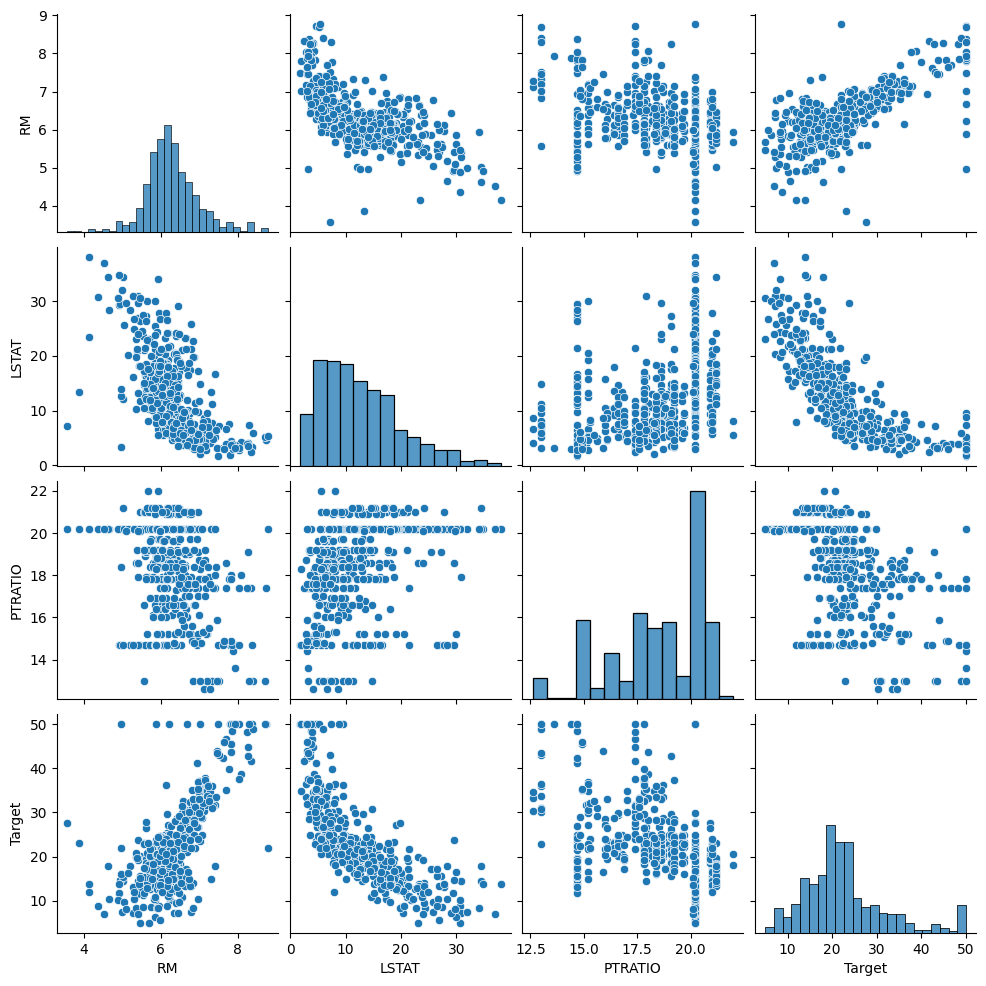

In [ ]:
# 그래프 그려서 상관관계 확인해보기 - LSTAT와 RM이 높은 상관 계수를 보임
sns.pairplot(house_df[top_corr_features])
plt.show()

In [ ]:
house_df = house_df[top_corr_features]

X_data = house_df.drop(['Target'], axis=1)
y_data = house_df['Target']

In [ ]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 3) (102, 3)
(404,) (102,)


In [ ]:
# feature 끼리 단위가 차이나니까 scaler 적용
from sklearn.preprocessing import StandardScaler

# fit_transform: train data
# transform: test data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
X_train_s

array([[ 0.64950435,  0.81176449,  0.81181002],
       [-0.06936357,  0.00470343,  0.81181002],
       [ 0.99525245, -1.13955437, -1.64542439],
       ...,
       [ 0.63509818, -0.86730946,  0.30181798],
       [-1.82259455, -0.09894311, -1.73815021],
       [-1.31837858, -0.3656602 ,  0.81181002]])

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


# scaling
svr = SVR()
svr.fit(X_train_s, y_train)

tree = DecisionTreeRegressor()
tree.fit(X_train_s, y_train)

# no scaling
svr2 = SVR()
svr2.fit(X_train, y_train)

tree2 = DecisionTreeRegressor()
tree2.fit(X_train, y_train)

DecisionTreeRegressor()

Scaling 했을 때의 평가

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 예측값 생성
y_pred_train = svr.predict(X_train_s)
y_pred_test = svr.predict(X_test_s)

# 평균 절댓값 오차(MAE) 계산
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('<SVR>')
print("훈련 세트 MAE: ", mae_train)
print("테스트 세트 MAE: ", mae_test)

<SVR>
훈련 세트 MAE:  3.0432304462048085
테스트 세트 MAE:  2.7437639210675218


In [ ]:
# 예측값 생성
y_pred_train2 = tree.predict(X_train_s)
y_pred_test2 = tree.predict(X_test_s)

# 평균 절댓값 오차(MAE) 계산
mae_train = mean_absolute_error(y_train, y_pred_train2)
mae_test = mean_absolute_error(y_test, y_pred_test2)

print('<Tree>')
print("훈련 세트 MAE: ", mae_train)
print("테스트 세트 MAE: ", mae_test)

<Tree>
훈련 세트 MAE:  0.0
테스트 세트 MAE:  2.9578431372549026


Scaling 안했을 때 평가

In [ ]:
# 예측값 생성
y_pred_train3 = svr2.predict(X_train)
y_pred_test3 = svr2.predict(X_test)

# 평균 절댓값 오차(MAE) 계산
mae_train = mean_absolute_error(y_train, y_pred_train3)
mae_test = mean_absolute_error(y_test, y_pred_test3)

print('<SVR>')
print("훈련 세트 MAE: ", mae_train)
print("테스트 세트 MAE: ", mae_test)

<SVR>
훈련 세트 MAE:  3.7221037854002588
테스트 세트 MAE:  3.497546541886454


In [ ]:
# 예측값 생성
y_pred_train4 = tree2.predict(X_train)
y_pred_test4 = tree2.predict(X_test)

# 평균 절댓값 오차(MAE) 계산
mae_train = mean_absolute_error(y_train, y_pred_train4)
mae_test = mean_absolute_error(y_test, y_pred_test4)

print('<Tree>')
print("훈련 세트 MAE: ", mae_train)
print("테스트 세트 MAE: ", mae_test)

<Tree>
훈련 세트 MAE:  0.0
테스트 세트 MAE:  3.0264705882352945


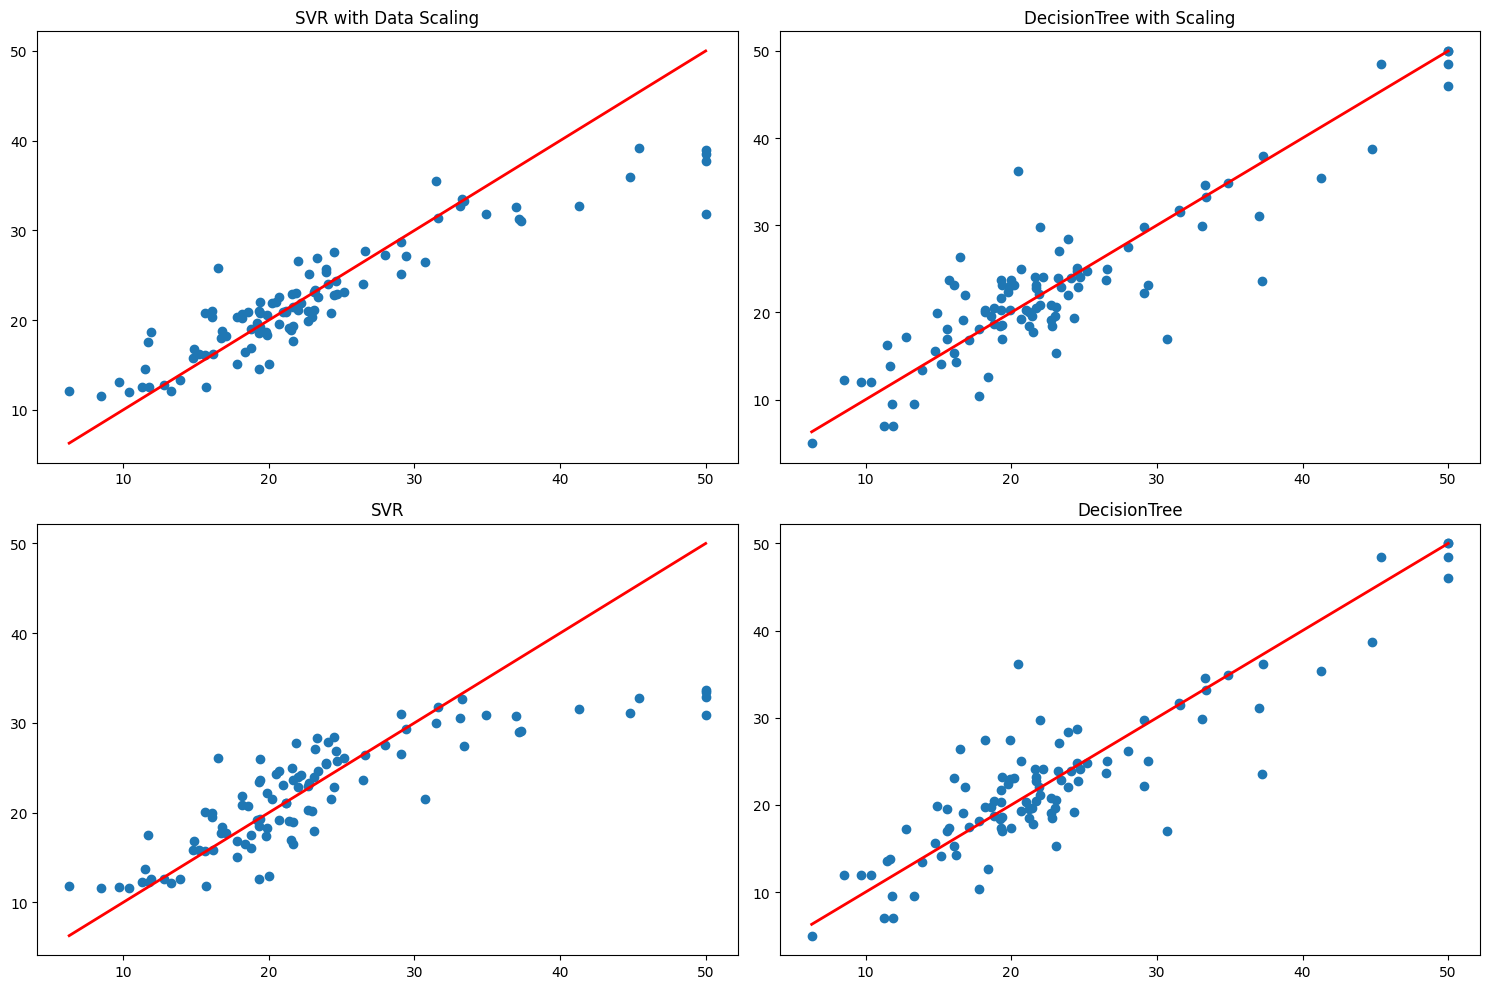

In [ ]:
plt.figure(figsize=(15,10))

# 2x2 그리드의 subplot 생성
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('SVR with Data Scaling')

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_test2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('DecisionTree with Scaling')

plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_test3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('SVR')

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_test4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('DecisionTree')

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [ ]:
# 간단한 인공 신경망
model = keras.Sequential()
model.add(Dense(16,input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [ ]:
# 모델 학습
history = model.fit(X_train_s, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/500
21/21 [==============================] - 1s 11ms/step - loss: 521.0227 - mse: 521.0227 - val_loss: 349.9154 - val_mse: 349.9154
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 284.9882 - mse: 284.9882 - val_loss: 99.3008 - val_mse: 99.3008
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 66.9387 - mse: 66.9387 - val_loss: 46.2240 - val_mse: 46.2240
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 35.3812 - mse: 35.3812 - val_loss: 28.7015 - val_mse: 28.7015
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 26.5219 - mse: 26.5219 - val_loss: 24.2061 - val_mse: 24.2061
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 25.0721 - mse: 25.0721 - val_loss: 22.6440 - val_mse: 22.6440
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 24.2841 - mse: 24.2841 - val_loss: 22.0173 - val_mse: 22.0173
Epoch 8/500
21/21 [=============================

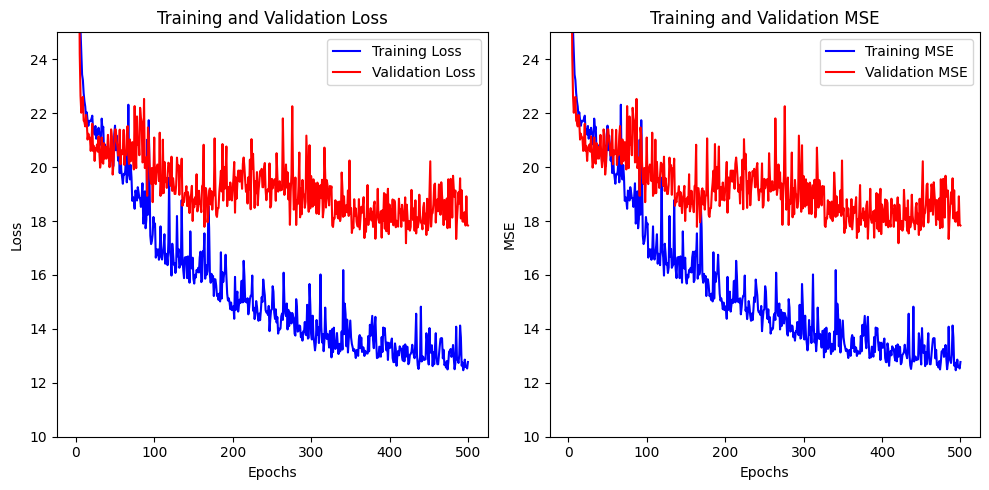

In [53]:
# 학습 중 발생한 손실과 MSE 추출
loss = history.history['loss']
mse = history.history['mse']
val_loss = history.history['val_loss']
val_mse = history.history['val_mse']

# 에포크 수
epochs = range(1, len(loss) + 1)

# 손실 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.ylim(10, 25)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MSE 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, mse, 'b-', label='Training MSE')
plt.plot(epochs, val_mse, 'r-', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.ylim(10, 25)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()